## Techniques for Feature Selection and Parameter Optimization

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Import titanic data using pandas

Modified version of the "Titanic" data can be found at: http://facweb.cs.depaul.edu/mobasher/classes/csc478/Data/titanic-trimmed.csv. Original unmodified Titanic data is available at <a href="http://lib.stat.cmu.edu/S/Harrell/data/ascii/titanic.txt">CMU StatLib</a>.

In [3]:
url = "http://facweb.cs.depaul.edu/mobasher/classes/csc478/Data/titanic-trimmed.csv"
titanic = pd.read_csv(url)
titanic.head(10)

,pid,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1st,1,female,29.0,0,0,211.337494,Southampton
1,2,1st,1,male,NaN,1,2,151.550003,Southampton
2,3,1st,0,female,2.0,1,2,151.550003,Southampton
3,4,1st,0,male,30.0,1,2,151.550003,Southampton
4,5,1st,0,female,25.0,1,2,151.550003,Southampton
5,6,1st,1,male,48.0,0,0,26.549999,Southampton
6,7,1st,1,female,63.0,1,0,77.958298,Southampton
7,8,1st,0,male,39.0,0,0,0.000000,Southampton
8,9,1st,1,female,53.0,2,0,51.479198,Southampton
9,10,1st,0,male,71.0,0,0,49.504200,Cherbourg


In [5]:
titanic.describe(include="all")

,pid,pclass,survived,sex,age,sibsp,parch,fare,embarked
count,1309.000000,1309,1309.000000,1309,1045.000000,1309.000000,1309.000000,1308.000000,1307
unique,NaN,3,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,3rd,NaN,male,NaN,NaN,NaN,NaN,Southampton
freq,NaN,709,NaN,843,NaN,NaN,NaN,NaN,914
mean,655.000000,NaN,0.381971,NaN,29.908852,0.498854,0.385027,33.295479,NaN
std,378.020061,NaN,0.486055,NaN,14.392485,1.041658,0.865560,51.758669,NaN
min,1.000000,NaN,0.000000,NaN,0.166700,0.000000,0.000000,0.000000,NaN
25%,328.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,NaN,NaN
50%,655.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,NaN,NaN
75%,982.000000,NaN,1.000000,NaN,NaN,1.000000,0.000000,NaN,NaN


#### Handling missing variables

In [6]:
titanic[titanic.age.isnull()].shape

(264, 9)

In [7]:
age_mean = titanic.age.mean()
titanic.age.fillna(age_mean, axis=0, inplace=True)
titanic.dropna(axis=0, inplace=True)

In [8]:
titanic.shape

(1306, 9)

In [9]:
titanic.set_index('pid', drop=True, inplace=True)
titanic.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
pid,,,,,,,,
1,1st,1,female,29.000000,0,0,211.337494,Southampton
2,1st,1,male,29.908852,1,2,151.550003,Southampton
3,1st,0,female,2.000000,1,2,151.550003,Southampton
4,1st,0,male,30.000000,1,2,151.550003,Southampton
5,1st,0,female,25.000000,1,2,151.550003,Southampton


#### Creating dummy variables for categorical features

In [10]:
titanic_ssf = pd.get_dummies(titanic)
titanic_ssf.head(10)

,survived,age,sibsp,parch,fare,pclass_1st,pclass_2nd,pclass_3rd,sex_female,sex_male,embarked_Cherbourg,embarked_Queenstown,embarked_Southampton
pid,,,,,,,,,,,,,
1,1,29.000000,0,0,211.337494,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1,29.908852,1,2,151.550003,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0,2.000000,1,2,151.550003,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,30.000000,1,2,151.550003,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,0,25.000000,1,2,151.550003,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,1,48.000000,0,0,26.549999,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7,1,63.000000,1,0,77.958298,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8,0,39.000000,0,0,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9,1,53.000000,2,0,51.479198,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [11]:
titanic_names = titanic_ssf.columns.values
titanic_names

array(['survived', 'age', 'sibsp', 'parch', 'fare', 'pclass_1st',
       'pclass_2nd', 'pclass_3rd', 'sex_female', 'sex_male',
       'embarked_Cherbourg', 'embarked_Queenstown', 'embarked_Southampton'], dtype=object)

In [12]:
y = titanic_ssf['survived']
X = titanic_ssf[titanic_names[1:]]
X.head()

,age,sibsp,parch,fare,pclass_1st,pclass_2nd,pclass_3rd,sex_female,sex_male,embarked_Cherbourg,embarked_Queenstown,embarked_Southampton
pid,,,,,,,,,,,,
1,29.000000,0,0,211.337494,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,29.908852,1,2,151.550003,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2.000000,1,2,151.550003,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,30.000000,1,2,151.550003,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,25.000000,1,2,151.550003,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [13]:
titanic_ssf.describe()

,survived,age,sibsp,parch,fare,pclass_1st,pclass_2nd,pclass_3rd,sex_female,sex_male,embarked_Cherbourg,embarked_Queenstown,embarked_Southampton
count,1306.000000,1306.000000,1306.00000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000
mean,0.381317,29.854661,0.50000,0.385911,33.223956,0.245789,0.212098,0.542113,0.355283,0.644717,0.206738,0.094181,0.699081
std,0.485896,12.812320,1.04258,0.866357,51.765986,0.430719,0.408950,0.498414,0.478782,0.478782,0.405121,0.292192,0.458833
min,0.000000,0.166700,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.00000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.908852,0.00000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,35.000000,1.00000,0.000000,31.275000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,80.000000,8.00000,9.000000,512.329224,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
titanic_ssf.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,1306.0,0.381317,0.485896,0.0000,0.0000,0.000000,1.000,1.000000
age,1306.0,29.854661,12.812320,0.1667,22.0000,29.908852,35.000,80.000000
sibsp,1306.0,0.500000,1.042580,0.0000,0.0000,0.000000,1.000,8.000000
parch,1306.0,0.385911,0.866357,0.0000,0.0000,0.000000,0.000,9.000000
fare,1306.0,33.223956,51.765986,0.0000,7.8958,14.454200,31.275,512.329224
pclass_1st,1306.0,0.245789,0.430719,0.0000,0.0000,0.000000,0.000,1.000000
pclass_2nd,1306.0,0.212098,0.408950,0.0000,0.0000,0.000000,0.000,1.000000
pclass_3rd,1306.0,0.542113,0.498414,0.0000,0.0000,1.000000,1.000,1.000000
sex_female,1306.0,0.355283,0.478782,0.0000,0.0000,0.000000,1.000,1.000000
sex_male,1306.0,0.644717,0.478782,0.0000,0.0000,1.000000,1.000,1.000000


#### Build the training and testing dataset

In [15]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [16]:
# Now let's train the decision tree on the training data

from sklearn import tree
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt = dt.fit(X_train, y_train)


#### A versatile function to measure performance of a calssification model

In [17]:
from sklearn import metrics

def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred = clf.predict(X)   
    if show_accuracy:
         print "Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n"
    if show_classification_report:
        print "Classification report"
        print metrics.classification_report(y, y_pred),"\n"
      
    if show_confussion_matrix:
        print "Confussion matrix"
        print metrics.confusion_matrix(y, y_pred),"\n"

In [18]:
from sklearn import metrics
measure_performance(X_test, y_test, dt, show_confussion_matrix=False, show_classification_report=True)

Accuracy:0.752 

Classification report
             precision    recall  f1-score   support

          0       0.79      0.81      0.80       161
          1       0.68      0.66      0.67       101

avg / total       0.75      0.75      0.75       262




### Feature Selection

#### Select the top 30% of the most important features, using a chi2 test

In [19]:
from sklearn import feature_selection

In [20]:
fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=30)
X_train_fs = fs.fit_transform(X_train, y_train)

In [21]:
np.set_printoptions(suppress=True, precision=2, linewidth=80)
print fs.get_support()
print fs.scores_

[False False False  True  True False False  True  True False False False]
[   17.19     0.      22.34  5185.44    61.98     1.28    35.15   189.1    102.94
    27.57     0.01     8.16]


In [22]:
X.columns.values

array(['age', 'sibsp', 'parch', 'fare', 'pclass_1st', 'pclass_2nd',
       'pclass_3rd', 'sex_female', 'sex_male', 'embarked_Cherbourg',
       'embarked_Queenstown', 'embarked_Southampton'], dtype=object)

In [23]:
print X.columns[fs.get_support()].values

['fare' 'pclass_1st' 'sex_female' 'sex_male']


In [24]:
for i in range(len(X.columns.values)):
    if fs.get_support()[i]:
        print X.columns.values[i],'\t', fs.scores_[i] 

fare 	5185.44064552
pclass_1st 	61.9841474215
sex_female 	189.101172577
sex_male 	102.94265016


In [25]:
print X_train_fs

[[ 31.39   0.     0.     1.  ]
 [ 15.05   0.     0.     1.  ]
 [ 91.08   1.     0.     1.  ]
 ..., 
 [ 21.     0.     1.     0.  ]
 [ 31.5    0.     0.     1.  ]
 [  7.9    0.     0.     1.  ]]


#### Evaluate performance with the new feature set on test data

In [26]:
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train_fs, y_train)
X_test_fs = fs.transform(X_test)
measure_performance(X_test_fs, y_test, dt, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.821 



#### To do feature selection more systematically, we need to find the best percentile using cross-validation

1 0.701217948718
6 0.701217948718
11 0.76141025641
16 0.76141025641
21 0.76141025641
26 0.76141025641
31 0.758543956044
36 0.758543956044
41 0.768141025641
46 0.764294871795
51 0.764294871795
56 0.759523809524
61 0.758562271062
66 0.749990842491
71 0.749038461538
76 0.756675824176
81 0.754752747253
86 0.747097069597
91 0.752802197802
96 0.75380952381
Optimal percentile of features:41 

Optimal number of features:4 



c:\anaconda\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  
c:\anaconda\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  from ipykernel import kernelapp as app


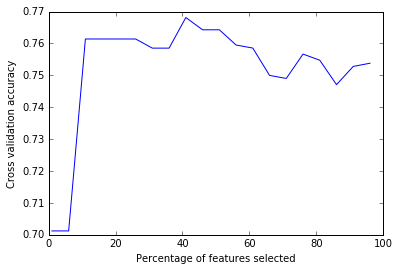

In [29]:
from sklearn import cross_validation
dt = tree.DecisionTreeClassifier(criterion='entropy')

percentiles = range(1, 100, 5)
results = []
for i in range(1, 100, 5):
    fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=i)
    X_train_fs = fs.fit_transform(X_train, y_train)
    scores = cross_validation.cross_val_score(dt, X_train_fs, y_train, cv=5)
    print i,scores.mean()
    results = np.append(results, scores.mean())

optimal_percentile = np.where(results == results.max())[0]
print "Optimal percentile of features:{0}".format(percentiles[optimal_percentile]), "\n"
optimal_num_features = int(percentiles[optimal_percentile]*len(X.columns)/100)
print "Optimal number of features:{0}".format(optimal_num_features), "\n"

# Plot percentile of features VS. cross-validation scores
import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles,results)

### Evaluate our best number of features on the test set

In [87]:
fs = feature_selection.SelectKBest(feature_selection.chi2, optimal_num_features)
X_train_fs = fs.fit_transform(X_train, y_train)
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train_fs, y_train)
X_test_fs = fs.transform(X_test)
measure_performance(X_test_fs, y_test, dt, show_confussion_matrix=False, show_classification_report=True)

Accuracy:0.821 

Classification report
             precision    recall  f1-score   support

          0       0.86      0.84      0.85       161
          1       0.76      0.78      0.77       101

avg / total       0.82      0.82      0.82       262




### Model selection

#### Exploring and comparing model parameters

In [30]:
print dt.get_params()

{'presort': False, 'splitter': 'best', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'criterion': 'entropy', 'random_state': None, 'max_features': None, 'max_depth': None, 'class_weight': None}


#### Let's first focus on "criterion' parameter and find the best one

In [33]:
dt = tree.DecisionTreeClassifier(criterion='entropy')
scores = cross_validation.cross_val_score(dt, X_train_fs, y_train, cv=5)
print "Entropy criterion accuracy on cv: {0:.3f}".format(scores.mean())
dt = tree.DecisionTreeClassifier(criterion='gini')
scores = cross_validation.cross_val_score(dt, X_train_fs, y_train, cv=5)
print "Gini criterion accuracy on cv: {0:.3f}".format(scores.mean())


Entropy criterion accuracy on cv: 0.752
Gini criterion accuracy on cv: 0.739


In [34]:
dt.fit(X_train_fs, y_train)
X_test_fs = fs.transform(X_test)
measure_performance(X_test_fs, y_test, dt, show_confussion_matrix=False, show_classification_report=True)

Accuracy:0.748 

Classification report
             precision    recall  f1-score   support

          0       0.79      0.80      0.80       161
          1       0.68      0.66      0.67       101

avg / total       0.75      0.75      0.75       262




In [35]:
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)
measure_performance(X_test, y_test, dt, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.760 



#### Another parameter of decision tree that can have an impact on accuracy is 'max-depth'

In [36]:
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.set_params(max_depth=5)

dt.fit(X_train, y_train)
measure_performance(X_test, y_test, dt, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.790 



#### But, again, we need a more systematic way to explore the space of values for each parameter. The following is a general function that performs cross-validation using a range of values for a specified parameter of a model

In [37]:
from sklearn.cross_validation import KFold

def calc_params(X, y, clf, param_values, param_name, K):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing scores with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        print param_name, ' = ', param_value
        
        # set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(len(X), K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        for j, (train, test) in enumerate(cv):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit([X[k] for k in train], y[train])
            k_train_scores[j] = clf.score([X[k] for k in train], y[train])
            k_test_scores[j] = clf.score([X[k] for k in test], y[test])
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

#### Now we can explore the impact of max-depth more systematically

In [38]:
# Let's create an evenly spaced range of numbers in a specified interval
md = np.linspace(1, 40, 20)
md = np.array([int(e) for e in md])
print md

[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 40]


max_depth  =  1
max_depth  =  3
max_depth  =  5
max_depth  =  7
max_depth  =  9
max_depth  =  11
max_depth  =  13
max_depth  =  15
max_depth  =  17
max_depth  =  19
max_depth  =  21
max_depth  =  23
max_depth  =  25
max_depth  =  27
max_depth  =  29
max_depth  =  31
max_depth  =  33
max_depth  =  35
max_depth  =  37
max_depth  =  40


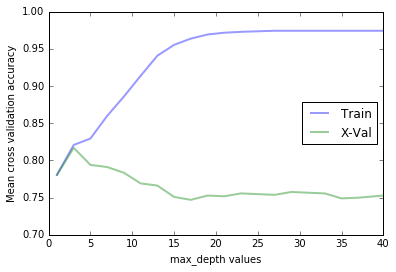

In [39]:
train_scores, test_scores = calc_params(X_train, y_train, dt, md, 'max_depth', 5)

#### max_depth = 3 seems to work best; larger values seem to lead to over-fitting.

In [40]:
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.set_params(max_depth=3)

dt.fit(X_train, y_train)
measure_performance(X_test, y_test, dt, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.798 



#### Another parameter of decision tree that's important is the min number of samples allowed at a leaf node

min_samples_leaf  =  1
min_samples_leaf  =  3
min_samples_leaf  =  5
min_samples_leaf  =  7
min_samples_leaf  =  9
min_samples_leaf  =  11
min_samples_leaf  =  13
min_samples_leaf  =  15
min_samples_leaf  =  17
min_samples_leaf  =  19
min_samples_leaf  =  21
min_samples_leaf  =  23
min_samples_leaf  =  25
min_samples_leaf  =  27
min_samples_leaf  =  30


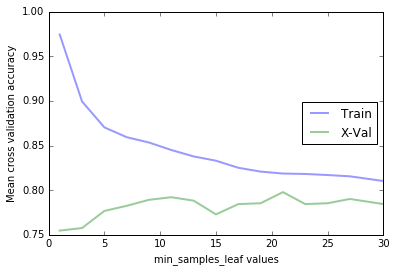

In [41]:
msl = np.linspace(1, 30, 15)
msl = np.array([int(e) for e in msl])

dt = tree.DecisionTreeClassifier(criterion='entropy')
train_scores, test_scores = calc_params(X_train, y_train, dt, msl, 'min_samples_leaf', 5)


### Looks like min_samples_leaf around 11 seems like a good choice

In [43]:
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.set_params(min_samples_leaf=11)

dt.fit(X_train, y_train)
measure_performance(X_test, y_test, dt, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.763 



#### Grid Search allows us to more systemiatically explore different combinations of multiple parameters

In [44]:
from sklearn.grid_search import GridSearchCV

dt = tree.DecisionTreeClassifier()

parameters = {
    'criterion': ['entropy','gini'],
    'max_depth': np.linspace(1, 20, 10),
    'min_samples_leaf': np.linspace(1, 30, 15),
    'min_samples_split': np.linspace(2, 20, 10)
}

gs = GridSearchCV(dt, parameters, verbose=1, cv=5)

In [45]:
%time _ = gs.fit(X_train, y_train)

gs.best_params_, gs.best_score_

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 799 tasks       | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done 1249 tasks       | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done 1799 tasks       | elapsed:    6.9s
[Parallel(n_jobs=1)]: Done 2449 tasks       | elapsed:    9.7s
[Parallel(n_jobs=1)]: Done 3199 tasks       | elapsed:   13.0s
[Parallel(n_jobs=1)]: Done 4049 tasks       | elapsed:   16.8s
[Parallel(n_jobs=1)]: Done 4999 tasks       | elapsed:   21.2s
[Parallel(n_jobs=1)]: Done 6049 tasks       | elapsed:   25.9s
[Parallel(n_jobs=1)]: Done 7199 tasks       | elapsed:   31.3s
[Parallel(n_jobs=1)]: Done 8449 tasks       | elapsed:   36.2s
[Parallel(n_jobs=1)]: Done 9799 tasks       | elapsed:   41.6s
[Parallel(n_jobs=1)]: Done 11249 tasks       | elapsed:   47.9s
[Parallel(n_jobs=1)]: Done 12799 tasks       | elapsed:   

Wall time: 1min 4s


[Parallel(n_jobs=1)]: Done 15000 out of 15000 | elapsed:  1.1min finished


({'criterion': 'gini',
  'max_depth': 3.1111111111111112,
  'min_samples_leaf': 3.0714285714285716,
  'min_samples_split': 2.0},
 0.81321839080459768)

In [46]:
dt = tree.DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=3, min_samples_split=2)

dt.fit(X_train, y_train)
measure_performance(X_test, y_test, dt, show_confussion_matrix=False, show_classification_report=True)

Accuracy:0.798 

Classification report
             precision    recall  f1-score   support

          0       0.83      0.85      0.84       161
          1       0.75      0.71      0.73       101

avg / total       0.80      0.80      0.80       262


